# Preparação dos Dados

## Imports e Inicialização

In [1]:
#pip install pandas numpy matplotlib plotly nbformat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

file_path = './PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True
df_original = pd.read_csv(file_path, delimiter=';')

In [3]:
df_original.head(3)

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.2,9.433333,NaN,2.0,5.625,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ajustes e Transformações

Primeiramente, vamos separar os dados da coluna 'FASE_TURMA_2020' em duas colunas: 'FASE_2020' e 'TURMA_2020'

In [4]:
df_original[['FASE_2020', 'TURMA_2020']] = df_original['FASE_TURMA_2020'].str.extract(r'(.{1})(.{1})')
df_original.drop('FASE_TURMA_2020', axis=1, inplace=True)

In [5]:
df_original['ID_ALUNO']=df_original['NOME'].str.split('-').str[1].astype(int)
#df_original.set_index('ID_ALUNO', inplace=True)
#df_original.drop('NOME', axis=1, inplace=True)

In [6]:
df_original.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,FASE_2020,TURMA_2020,ID_ALUNO
0,Escola Pública,ALUNO-1,11,2,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H,1
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),NaN,NaN,2
2,Escola Pública,ALUNO-3,12,2,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,H,3
3,Escola Pública,ALUNO-4,10,2,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),1,D,4
4,Escola Pública,ALUNO-5,10,1,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de 

In [7]:
df_original.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'PONTO_VIRADA_2020', 'INDE_2020', 'INDE_CONCEITO_2020',
       'PEDRA_2020', 'DESTAQUE_IEG_2020', 'DESTAQUE_IDA_2020',
       'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021', 'TURMA_2021',
       'INSTITUICAO_ENSINO_ALUNO_2021', 'SINALIZADOR_INGRESSANTE_2021',
       'PEDRA_2021', 'INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021',
       'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021', 'REC_EQUIPE_2_2021',
       'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021', 'PONTO_VIRADA_2021',
       'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021', 'DEFASAGEM_2021',
       'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       '

Para facilitar a análise dos dados, vamos selecionar apenas as colunas que são comuns a todos os anos.

In [8]:
df_novo = df_original[['ID_ALUNO','NOME','FASE_2020','TURMA_2020','PONTO_VIRADA_2020','INDE_2020','PEDRA_2020','IAA_2020','IEG_2020','IPS_2020','IDA_2020','IPP_2020','IPV_2020','IAN_2020',
'FASE_2021','TURMA_2021','PONTO_VIRADA_2021','INDE_2021','PEDRA_2021','IAA_2021','IEG_2021','IPS_2021','IDA_2021','IPP_2021','IPV_2021','IAN_2021',
'FASE_2022','TURMA_2022','PONTO_VIRADA_2022','INDE_2022','PEDRA_2022','IAA_2022','IEG_2022','IPS_2022','IDA_2022','IPP_2022','IPV_2022','IAN_2022']]
df_novo

,ID_ALUNO,NOME,FASE_2020,TURMA_2020,PONTO_VIRADA_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,PONTO_VIRADA_2021,INDE_2021,PEDRA_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,FASE_2022,TURMA_2022,PONTO_VIRADA_2022,INDE_2022,PEDRA_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022
0,1,ALUNO-1,2,H,Não,7.883752,Ametista,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Não,7.319,Ametista,7.5,6.3,6.9,8.8,7.7,8.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,Não,7.675509,Ametista,10.00002,7.581705,7.500,8.816667,5.625000,7.916665,5.0
2,3,ALUNO-3,3,H,Não,7.856389666666666,Ametista,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Não,7.021,Ametista,7.1,6.9,6.3,5.6,7.3,7.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ALUNO-4,1,D,Não,5.076252,Quartzo,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,Não,7.117065,Ametista,10.00002,8.071429,7.500,5.083333,6.250000,8.055553,5.0
4,5,ALUNO-5,2,M,Não,8.077085,Ametista,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Não,7.399,Ametista,7.4,7.5,7.5,5.4,8.5,7.4,10.0,2.0,L,Não,7.232336,Ametista,6.41668,8.557505,7.500,7.083333,6.458333,7.833337,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,1345,ALUNO-1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,L,Não,6.606,Ágata,9.0,6.7,7.5,4.9,7.2,7.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,1346,ALUNO-1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,U,Sim,8.135538,Topázio,9.00002,9.031839,7.500,9.000000,5.625000,9.083340,5.0
1346,1347,ALUNO-1347,7,B,Não,7.158543333333334,Ágata,9.16668,8.1,6.875,4.666666666666667,7.34375,6.333335,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,1348,ALUNO-1348,3,R,Sim,7.842224333333333,Ametista,7.91667,7.1,6.875,6.333333333333333,8.541666666666666,9.11112,10,3.0,J,Não,7.422,Ametista,7.5,8.6,6.3,6.9,7.5,8.5,5.0,4.0,P,Não,6.749981,Ágata,8.33334,9.178030,5.625,5.900000,6.718750,5.833328,5.0


Observa-se que temos colunas atribuidas por ano, vamos separar esse DataFrame em 3 DataFrames por colunas referentes a cada ano, usando o "ID_ALUNO" e o "NOME" como chave

In [9]:
df_2020 = pd.concat([df_novo[['ID_ALUNO','NOME']], df_novo.filter(regex='_2020')], axis=1)
df_2021 = pd.concat([df_novo[['ID_ALUNO','NOME']], df_novo.filter(regex='_2021')], axis=1)
df_2022 = pd.concat([df_novo[['ID_ALUNO','NOME']], df_novo.filter(regex='_2022')], axis=1)

Agora iremos retirar as linhas que possuem somente valores nulos (NaN)

In [10]:
df_2020_filtrado = df_2020[df_2020['FASE_2020'].notnull()]
df_2021_filtrado = df_2021[df_2021['FASE_2021'].notnull()]
df_2022_filtrado = df_2022[df_2022['FASE_2022'].notnull()]

Agora vamos remover o sufixo das colunas e criar uma nova coluna 'ANO_PESQUISA'

In [11]:
df_2020_filtrado.columns = df_2020_filtrado.columns.str.removesuffix("_2020")
df_2021_filtrado.columns = df_2021_filtrado.columns.str.removesuffix("_2021")
df_2022_filtrado.columns = df_2022_filtrado.columns.str.removesuffix("_2022")


In [12]:
df_2020_filtrado.insert(loc=0, column='ANO_PESQUISA', value=2020)
df_2021_filtrado.insert(loc=0, column='ANO_PESQUISA', value=2021)
df_2022_filtrado.insert(loc=0, column='ANO_PESQUISA', value=2022)

In [13]:
print(df_2020_filtrado.columns)
print(df_2021_filtrado.columns)
print(df_2022_filtrado.columns)

Index(['ANO_PESQUISA', 'ID_ALUNO', 'NOME', 'FASE', 'TURMA', 'PONTO_VIRADA',
       'INDE', 'PEDRA', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN'],
      dtype='object')
Index(['ANO_PESQUISA', 'ID_ALUNO', 'NOME', 'FASE', 'TURMA', 'PONTO_VIRADA',
       'INDE', 'PEDRA', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN'],
      dtype='object')
Index(['ANO_PESQUISA', 'ID_ALUNO', 'NOME', 'FASE', 'TURMA', 'PONTO_VIRADA',
       'INDE', 'PEDRA', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN'],
      dtype='object')


In [14]:
df_2020_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 1347
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ANO_PESQUISA  728 non-null    int64 
 1   ID_ALUNO      728 non-null    int32 
 2   NOME          728 non-null    object
 3   FASE          728 non-null    object
 4   TURMA         728 non-null    object
 5   PONTO_VIRADA  702 non-null    object
 6   INDE          728 non-null    object
 7   PEDRA         728 non-null    object
 8   IAA           728 non-null    object
 9   IEG           728 non-null    object
 10  IPS           728 non-null    object
 11  IDA           728 non-null    object
 12  IPP           728 non-null    object
 13  IPV           728 non-null    object
 14  IAN           728 non-null    object
dtypes: int32(1), int64(1), object(13)
memory usage: 88.2+ KB


In [15]:
df_final = pd.concat([df_2020_filtrado, df_2021_filtrado, df_2022_filtrado], axis=0, ignore_index=True)

In [16]:
df_final

,ANO_PESQUISA,ID_ALUNO,NOME,FASE,TURMA,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN
0,2020,1,ALUNO-1,2,H,Não,7.883752,Ametista,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,2020,3,ALUNO-3,3,H,Não,7.856389666666666,Ametista,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
2,2020,4,ALUNO-4,1,D,Não,5.076252,Quartzo,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
3,2020,5,ALUNO-5,2,M,Não,8.077085,Ametista,7.50002,8,7.5,7.5,8.4375,8.166665,10
4,2020,8,ALUNO-8,4,L,Sim,8.381390666666666,Ametista,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2022,1342,ALUNO-1342,2.0,K,Não,8.150001,Topázio,7.91668,9.666667,7.5,7.75,6.25,7.5,10.0
2272,2022,1343,ALUNO-1343,2.0,K,Não,5.674644,Quartzo,7.41668,6.470435,6.25,2.0,6.25,7.444443,5.0
2273,2022,1346,ALUNO-1346,0.0,U,Sim,8.135538,Topázio,9.00002,9.031839,7.5,9.0,5.625,9.08334,5.0
2274,2022,1348,ALUNO-1348,4.0,P,Não,6.749981,Ágata,8.33334,9.17803,5.625,5.9,6.71875,5.833328,5.0


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ANO_PESQUISA  2276 non-null   int64 
 1   ID_ALUNO      2276 non-null   int32 
 2   NOME          2276 non-null   object
 3   FASE          2276 non-null   object
 4   TURMA         2276 non-null   object
 5   PONTO_VIRADA  2250 non-null   object
 6   INDE          2276 non-null   object
 7   PEDRA         2276 non-null   object
 8   IAA           2276 non-null   object
 9   IEG           2276 non-null   object
 10  IPS           2276 non-null   object
 11  IDA           2276 non-null   object
 12  IPP           2276 non-null   object
 13  IPV           2276 non-null   object
 14  IAN           2276 non-null   object
dtypes: int32(1), int64(1), object(13)
memory usage: 258.0+ KB


In [18]:
df_final.iloc[680]

ANO_PESQUISA          2020
ID_ALUNO              1259
NOME            ALUNO-1259
FASE                     D
TURMA                    2
PONTO_VIRADA         D9600
INDE                  D980
PEDRA             D9891/2A
IAA                   D910
IEG                   V920
IPS                   D930
IDA                   D940
IPP                   D950
IPV                   D960
IAN                   D970
Name: 680, dtype: object

In [19]:
df_final.drop(680, inplace=True)

In [20]:
df_final.iloc[759]

ANO_PESQUISA        2021
ID_ALUNO              71
NOME            ALUNO-71
FASE                 0.0
TURMA                  J
PONTO_VIRADA      #NULO!
INDE              #NULO!
PEDRA             #NULO!
IAA                  7.4
IEG                  0.0
IPS                  5.0
IDA                  3.6
IPP                  0.0
IPV                  0.0
IAN                  5.0
Name: 760, dtype: object

In [21]:
df_final.replace('#NULO!', np.nan, inplace=True)

In [22]:
df_final[['INDE', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP','IPV']] = df_final[['INDE', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP','IPV']].astype(float)

In [23]:
df_final['IS_PONTO_VIRADA'] = df_final['PONTO_VIRADA'].map({'Sim': True, 'Não': False})
df_final['IS_PONTO_VIRADA'] = df_final['IS_PONTO_VIRADA'].astype(bool)
df_final['SYMBOL'] = df_final.IS_PONTO_VIRADA.apply(lambda x: 17 if x == True else 1)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2275 entries, 0 to 2275
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANO_PESQUISA     2275 non-null   int64  
 1   ID_ALUNO         2275 non-null   int32  
 2   NOME             2275 non-null   object 
 3   FASE             2275 non-null   object 
 4   TURMA            2275 non-null   object 
 5   PONTO_VIRADA     2247 non-null   object 
 6   INDE             2273 non-null   float64
 7   PEDRA            2273 non-null   object 
 8   IAA              2275 non-null   float64
 9   IEG              2275 non-null   float64
 10  IPS              2275 non-null   float64
 11  IDA              2275 non-null   float64
 12  IPP              2275 non-null   float64
 13  IPV              2275 non-null   float64
 14  IAN              2275 non-null   float64
 15  IS_PONTO_VIRADA  2275 non-null   bool   
 16  SYMBOL           2275 non-null   int64  
dtypes: bool(1), float64

In [25]:
df_final[['ANO_PESQUISA','ID_ALUNO','FASE']] = df_final[['ANO_PESQUISA','ID_ALUNO','FASE']].astype(int)

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2275 entries, 0 to 2275
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANO_PESQUISA     2275 non-null   int32  
 1   ID_ALUNO         2275 non-null   int32  
 2   NOME             2275 non-null   object 
 3   FASE             2275 non-null   int32  
 4   TURMA            2275 non-null   object 
 5   PONTO_VIRADA     2247 non-null   object 
 6   INDE             2273 non-null   float64
 7   PEDRA            2273 non-null   object 
 8   IAA              2275 non-null   float64
 9   IEG              2275 non-null   float64
 10  IPS              2275 non-null   float64
 11  IDA              2275 non-null   float64
 12  IPP              2275 non-null   float64
 13  IPV              2275 non-null   float64
 14  IAN              2275 non-null   float64
 15  IS_PONTO_VIRADA  2275 non-null   bool   
 16  SYMBOL           2275 non-null   int64  
dtypes: bool(1), float64

In [27]:
df = df_final.round(2)

In [28]:
df.head()

,ANO_PESQUISA,ID_ALUNO,NOME,FASE,TURMA,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IS_PONTO_VIRADA,SYMBOL
0,2020,1,ALUNO-1,2,H,Não,7.88,Ametista,8.50,8.7,7.50,7.00,5.94,7.75,10.0,False,1
1,2020,3,ALUNO-3,3,H,Não,7.86,Ametista,7.92,8.9,7.50,5.50,8.12,8.11,10.0,False,1
2,2020,4,ALUNO-4,1,D,Não,5.08,Quartzo,8.00,4.1,6.88,0.00,7.19,7.75,5.0,False,1
3,2020,5,ALUNO-5,2,M,Não,8.08,Ametista,7.50,8.0,7.50,7.50,8.44,8.17,10.0,False,1
4,2020,8,ALUNO-8,4,L,Sim,8.38,Ametista,8.33,9.9,4.38,7.33,8.75,8.94,10.0,True,17


## Novas métricas

Vamos calcular as médias por ano dos alunos, agora que o dataframe está limpo para análise

In [29]:
df_media_ano_fase = df.groupby(['ANO_PESQUISA', 'FASE'])[['INDE', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP','IPV']].mean().round(2)
df_media_ano_fase.columns = ['INDE_MEDIO_ANO_FASE', 'IAN_MEDIO_ANO_FASE', 'IDA_MEDIO_ANO_FASE', 'IEG_MEDIO_ANO_FASE', 'IAA_MEDIO_ANO_FASE', 'IPS_MEDIO_ANO_FASE', 'IPP_MEDIO_ANO_FASE', 'IPV_MEDIO_ANO_FASE']
df_media_ano_fase

INDE_MEDIO_ANO_FASE  IAN_MEDIO_ANO_FASE  \
ANO_PESQUISA FASE                                            
2020         0                    8.02                7.50   
             1                    7.42                6.34   
             2                    7.11                7.34   
             3                    7.34                7.81   
             4                    7.08                7.45   
             5                    6.84                7.27   
             6                    6.24                8.67   
             7                    7.29                9.24   
             8                    7.71               10.00   
2021         0                    7.29                7.09   
             1                    6.92                5.96   
             2                    6.61                6.70   
             3                    6.70                7.50   
             4                    6.83                7.42   
             5                    6.89                6.90   
             6                    7.01                6.96   
             7                    7.66                8.95   
2022         0                    7.37                6.80   
             1                    7.20                5.74   
             2                    6.96                6.40   
             3                    6.60                6.99   
             4                    7.01                6.48   
             5                    6.88                6.25   
             6                    7.20                5.83   
             7                    6.38                6.09   

                   IDA_MEDIO_ANO_FASE  IEG_MEDIO_ANO_FASE  IAA_MEDIO_ANO_FASE  \
ANO_PESQUISA FASE                                                               
2020         0                   8.97                9.88                8.91   
             1                   7.07                7.83                8.72   
             2                   5.13                7.92                8.26   
             3                   6.40                7.41                8.55   
             4                   5.02                6.93                8.63   
             5                   5.05                6.97                8.22   
             6                   4.13                6.07                4.72   
             7                   5.71                7.15                8.13   
             8                   8.70                5.00                8.38   
2021         0                   5.73                7.80                8.91   
             1                   4.78                7.51                8.34   
             2                   5.11                6.20                7.29   
             3                   5.46                5.96                8.22   
             4                   5.75                6.31                8.40   
             5                   6.01                6.65                7.97   
             6                   6.40                7.12                8.20   
             7                   6.79                7.84                8.58   
2022         0                   7.13                8.09                8.98   
             1                   6.45                8.52                8.64   
             2                   5.40                8.16                8.41   
             3                   5.13                7.07                7.48   
             4                   6.05                7.66                7.71   
             5                   5.87                7.34                8.10   
             6                   6.69                7.03                6.50   
             7                   4.85                6.92                6.76   

                   IPS_MEDIO_ANO_FASE  IPP_MEDIO_ANO_FASE  IPV_MEDIO_ANO_FASE  
ANO_PESQUISA FASE                                                           

In [30]:
df_media_ano_fase_turma = df.groupby(['ANO_PESQUISA', 'FASE', 'TURMA'])[['INDE', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP','IPV']].mean().round(2)
df_media_ano_fase_turma.columns = ['INDE_MEDIO_ANO_FASE_TURMA', 'IAN_MEDIO_ANO_FASE_TURMA', 'IDA_MEDIO_ANO_FASE_TURMA', 'IEG_MEDIO_ANO_FASE_TURMA', 'IAA_MEDIO_ANO_FASE_TURMA', 'IPS_MEDIO_ANO_FASE_TURMA', 'IPP_MEDIO_ANO_FASE_TURMA', 'IPV_MEDIO_ANO_FASE_TURMA']
df_media_ano_fase_turma

INDE_MEDIO_ANO_FASE_TURMA  IAN_MEDIO_ANO_FASE_TURMA  \
ANO_PESQUISA FASE TURMA                                                        
2020         0    A                           7.97                      8.12   
                  B                           8.66                      8.64   
                  C                           8.32                      9.29   
                  D                           7.76                      5.77   
                  E                           7.79                      7.27   
...                                            ...                       ...   
2022         5    K                           7.22                      6.50   
                  L                           7.77                      7.50   
             6    A                           7.20                      5.83   
             7    A                           5.90                      6.67   
                  D                           7.27                      5.00   

                         IDA_MEDIO_ANO_FASE_TURMA  IEG_MEDIO_ANO_FASE_TURMA  \
ANO_PESQUISA FASE TURMA                                                       
2020         0    A                          9.19                      9.85   
                  B                          9.30                     10.00   
                  C                          7.11                     10.00   
                  D                          9.17                      9.75   
                  E                          9.18                      9.99   
...                                           ...                       ...   
2022         5    K                          6.34                      8.33   
                  L                          7.06                      8.12   
             6    A                          6.69                      7.03   
             7    A                          4.04                      5.68   
                  D                          6.38                      9.25   

                         IAA_MEDIO_ANO_FASE_TURMA  IPS_MEDIO_ANO_FASE_TURMA  \
ANO_PESQUISA FASE TURMA                                                       
2020         0    A                          8.68                      6.72   
                  B                          9.17                      7.67   
                  C                          9.20                      7.86   
                  D                          8.77                      5.77   
                  E                          8.89                      6.19   
...                                           ...                       ...   
2022         5    K                          8.12                      6.12   
                  L                          8.75                      7.25   
             6    A                          6.50                      7.95   
             7    A                          6.08                      6.25   
                  D                          8.02                      6.88   

                         IPP_MEDIO_ANO_FASE_TURMA  IPV_MEDIO_ANO_FASE_TURMA  
ANO_PESQUISA FASE TURMA                                                      
2020         0    A                          4.69                      6.69  
                  B                          7.05                      7.73  
                  C                          7.10                      7.75  
                  D                          5.96                      6.74  
                  E                          4.12                      6.56  
...                                           ...                       ...  
2022         5    K                          7.33                      7.42  
                  L                          8.11                      7.88  
             6    A                          7.86                      8.22  
             7    A                          6.92                     

In [31]:
join_media_ano_fase = pd.merge(
    left=df,
    right=df_media_ano_fase,
    how='left',
    left_on=['ANO_PESQUISA', 'FASE'],
    right_on=['ANO_PESQUISA', 'FASE'],
)
join_media_ano_fase

,ANO_PESQUISA,ID_ALUNO,NOME,FASE,TURMA,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IS_PONTO_VIRADA,SYMBOL,INDE_MEDIO_ANO_FASE,IAN_MEDIO_ANO_FASE,IDA_MEDIO_ANO_FASE,IEG_MEDIO_ANO_FASE,IAA_MEDIO_ANO_FASE,IPS_MEDIO_ANO_FASE,IPP_MEDIO_ANO_FASE,IPV_MEDIO_ANO_FASE
0,2020,1,ALUNO-1,2,H,Não,7.88,Ametista,8.50,8.70,7.50,7.00,5.94,7.75,10.0,False,1,7.11,7.34,5.13,7.92,8.26,6.73,7.37,7.67
1,2020,3,ALUNO-3,3,H,Não,7.86,Ametista,7.92,8.90,7.50,5.50,8.12,8.11,10.0,False,1,7.34,7.81,6.40,7.41,8.55,6.60,7.91,7.47
2,2020,4,ALUNO-4,1,D,Não,5.08,Quartzo,8.00,4.10,6.88,0.00,7.19,7.75,5.0,False,1,7.42,6.34,7.07,7.83,8.72,6.89,7.13,7.68
3,2020,5,ALUNO-5,2,M,Não,8.08,Ametista,7.50,8.00,7.50,7.50,8.44,8.17,10.0,False,1,7.11,7.34,5.13,7.92,8.26,6.73,7.37,7.67
4,2020,8,ALUNO-8,4,L,Sim,8.38,Ametista,8.33,9.90,4.38,7.33,8.75,8.94,10.0,True,17,7.08,7.45,5.02,6.93,8.63,7.08,8.25,7.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,2022,1342,ALUNO-1342,2,K,Não,8.15,Topázio,7.92,9.67,7.50,7.75,6.25,7.50,10.0,False,1,6.96,6.40,5.40,8.16,8.41,6.82,6.16,7.34
2271,2022,1343,ALUNO-1343,2,K,Não,5.67,Quartzo,7.42,6.47,6.25,2.00,6.25,7.44,5.0,False,1,6.96,6.40,5.40,8.16,8.41,6.82,6.16,7.34
2272,2022,1346,ALUNO-1346,0,U,Sim,8.14,Topázio,9.00,9.03,7.50,9.00,5.62,9.08,5.0,True,17,7.37,6.80,7.13,8.09,8.98,7.01,5.31,7.56
2273,2022,1348,ALUNO-1348,4,P,Não,6.75,Ágata,8.33,9.18,5.62,5.90,6.72,5.83,5.0,False,1,7.01,6.48,6.05,7.66,7.71,6.61,7.42,7.21


In [32]:
join_media_ano_fase_turma = pd.merge(
    left=join_media_ano_fase,
    right=df_media_ano_fase_turma,
    how='left',
    left_on=['ANO_PESQUISA', 'FASE','TURMA'],
    right_on=['ANO_PESQUISA', 'FASE', 'TURMA'],
)
join_media_ano_fase_turma

,ANO_PESQUISA,ID_ALUNO,NOME,FASE,TURMA,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IS_PONTO_VIRADA,SYMBOL,INDE_MEDIO_ANO_FASE,IAN_MEDIO_ANO_FASE,IDA_MEDIO_ANO_FASE,IEG_MEDIO_ANO_FASE,IAA_MEDIO_ANO_FASE,IPS_MEDIO_ANO_FASE,IPP_MEDIO_ANO_FASE,IPV_MEDIO_ANO_FASE,INDE_MEDIO_ANO_FASE_TURMA,IAN_MEDIO_ANO_FASE_TURMA,IDA_MEDIO_ANO_FASE_TURMA,IEG_MEDIO_ANO_FASE_TURMA,IAA_MEDIO_ANO_FASE_TURMA,IPS_MEDIO_ANO_FASE_TURMA,IPP_MEDIO_ANO_FASE_TURMA,IPV_MEDIO_ANO_FASE_TURMA
0,2020,1,ALUNO-1,2,H,Não,7.88,Ametista,8.50,8.70,7.50,7.00,5.94,7.75,10.0,False,1,7.11,7.34,5.13,7.92,8.26,6.73,7.37,7.67,6.75,7.08,3.98,7.72,8.65,6.15,6.04,8.10
1,2020,3,ALUNO-3,3,H,Não,7.86,Ametista,7.92,8.90,7.50,5.50,8.12,8.11,10.0,False,1,7.34,7.81,6.40,7.41,8.55,6.60,7.91,7.47,6.23,7.22,5.09,5.57,8.66,5.97,7.13,6.02
2,2020,4,ALUNO-4,1,D,Não,5.08,Quartzo,8.00,4.10,6.88,0.00,7.19,7.75,5.0,False,1,7.42,6.34,7.07,7.83,8.72,6.89,7.13,7.68,7.45,5.67,7.55,8.01,8.66,6.79,6.79,7.76
3,2020,5,ALUNO-5,2,M,Não,8.08,Ametista,7.50,8.00,7.50,7.50,8.44,8.17,10.0,False,1,7.11,7.34,5.13,7.92,8.26,6.73,7.37,7.67,6.75,7.35,4.18,7.35,7.93,6.47,7.45,7.65
4,2020,8,ALUNO-8,4,L,Sim,8.38,Ametista,8.33,9.90,4.38,7.33,8.75,8.94,10.0,True,17,7.08,7.45,5.02,6.93,8.63,7.08,8.25,7.73,6.71,8.21,4.36,6.29,8.45,6.43,8.17,7.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,2022,1342,ALUNO-1342,2,K,Não,8.15,Topázio,7.92,9.67,7.50,7.75,6.25,7.50,10.0,False,1,6.96,6.40,5.40,8.16,8.41,6.82,6.16,7.34,6.71,5.77,4.55,8.30,8.47,6.68,6.14,7.19
2271,2022,1343,ALUNO-1343,2,K,Não,5.67,Quartzo,7.42,6.47,6.25,2.00,6.25,7.44,5.0,False,1,6.96,6.40,5.40,8.16,8.41,6.82,6.16,7.34,6.71,5.77,4.55,8.30,8.47,6.68,6.14,7.19
2272,2022,1346,ALUNO-1346,0,U,Sim,8.14,Topázio,9.00,9.03,7.50,9.00,5.62,9.08,5.0,True,17,7.37,6.80,7.13,8.09,8.98,7.01,5.31,7.56,7.68,6.11,7.40,8.66,9.56,7.50,5.55,7.96
2273,2022,1348,ALUNO-1348,4,P,Não,6.75,Ágata,8.33,9.18,5.62,5.90,6.72,5.83,5.0,False,1,7.01,6.48,6.05,7.66,7.71,6.61,7.42,7.21,6.98,5.83,5.87,8.07,8.24,6.74,7.19,6.93


In [33]:
join_media_ano_fase_turma.to_csv('dados_finais.csv', index=False)

In [34]:
def gera_df_comparativo_aluno_medias(df):
    dataframes = {}
    for index, row in df.iterrows():
        ano_pesquisa = row['ANO_PESQUISA']
        data = {
            'Indice': ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP','IPV']*3,
            'Legenda': [f'Notas do Aluno ({ano_pesquisa})']*7 + [f'Médias da Fase ({ano_pesquisa})']*7 +[f'Médias da Turma ({ano_pesquisa})']*7,
            'Nota': [df['IAN'][index], df['IDA'][index], df['IEG'][index], df['IAA'][index], df['IPS'][index], df['IPP'][index], df['IPV'][index], df['IAN_MEDIO_ANO_FASE'][index], df['IDA_MEDIO_ANO_FASE'][index], df['IEG_MEDIO_ANO_FASE'][index], df['IAA_MEDIO_ANO_FASE'][index], df['IPS_MEDIO_ANO_FASE'][index], df['IPP_MEDIO_ANO_FASE'][index], df['IPV_MEDIO_ANO_FASE'][index], df['IAN_MEDIO_ANO_FASE_TURMA'][index], df['IDA_MEDIO_ANO_FASE_TURMA'][index], df['IEG_MEDIO_ANO_FASE_TURMA'][index], df['IAA_MEDIO_ANO_FASE_TURMA'][index], df['IPS_MEDIO_ANO_FASE_TURMA'][index], df['IPP_MEDIO_ANO_FASE_TURMA'][index], df['IPV_MEDIO_ANO_FASE_TURMA'][index]]
        }
        novo_df = pd.DataFrame(data)
        dataframes[ano_pesquisa] = novo_df
    return dataframes

In [35]:
def gera_df_comparativo_anos(df):
    data = {
        'Indice': [],
        'Legenda': [],
        'Nota': []
    }
    for index, row in df.iterrows():
        data['Indice'] += ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP','IPV']
        data['Legenda'] += [f"Notas do Aluno ({df['ANO_PESQUISA'][index]})"]*7
        data['Nota'] += [df['IAN'][index],df['IDA'][index],df['IEG'][index],df['IAA'][index],df['IPS'][index],df['IPP'][index],df['IPV'][index]]
    novo_df = pd.DataFrame(data)
    return novo_df

In [36]:
df_copy = join_media_ano_fase_turma.copy()

In [37]:
df1 = df_copy[(df_copy['ID_ALUNO'] == 8)]

In [38]:
teste1 = gera_df_comparativo_aluno_medias(df1)
teste2 = gera_df_comparativo_anos(df1)

In [39]:
for index, key in enumerate(teste1):
    fig1 = px.line_polar(teste1[key], r="Nota", theta="Indice", color="Legenda",
                        line_close=True, title='Comparativo das Notas do Aluno com as Médias ('+str(key)+')', markers=True, range_r=[0,10],  start_angle=0, direction='counterclockwise')
    fig1.show()

In [40]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}]*3],
                    subplot_titles=('2020', '2021', '2022'), column_titles=('2020', '2021', '2022'), x_title="Evolução do Aluno por Ano")
for index, key in enumerate(teste1):
    fig1 = px.line_polar(teste1[key], r="Nota", theta="Indice", color="Legenda", line_close=True, title="2020", markers=True, range_r=[0,10], start_angle=0, direction='counterclockwise')
    fig.add_traces(list(fig1.select_traces()),1,index+1)


fig.update_layout(
    showlegend=False
)

fig.show()

In [41]:
# df_melted = df1.melt(id_vars='ANO_PESQUISA', value_vars=['INDE', 'INDE_MEDIO_ANO_FASE', 'INDE_MEDIO_ANO_FASE_TURMA'], var_name='TIPO', value_name='NOTA')
# df_melted

In [42]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter'}, {'type': 'polar'}]],
                    subplot_titles=('INDE', 'Índices'), column_titles=('INDE', 'Índices'), x_title="Evolução do Aluno por Ano")
fig1 = px.line(df1, x="ANO_PESQUISA", y="INDE", markers=True, template="plotly_white",  symbol='SYMBOL')
fig2 = px.line_polar(teste2, r="Nota", theta="Indice", color="Legenda",
                    line_close=True, markers=True, range_r=[0,10], start_angle=0, direction='counterclockwise')

fig.add_traces(list(fig1.select_traces()),1,1)
fig.add_traces(list(fig2.select_traces()),1,2)
fig.show()

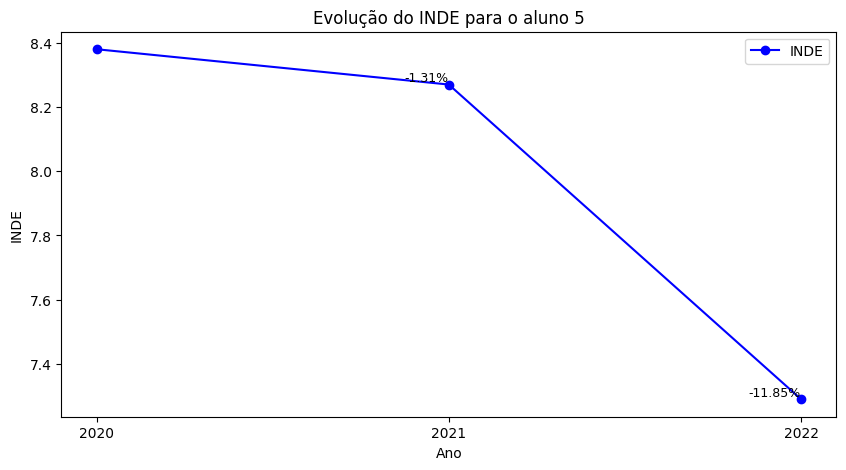

In [43]:
anos = df1['ANO_PESQUISA'].values
inde = df1['INDE'].values

plt.figure(figsize=(10, 5))
plt.plot(anos, inde, marker='o', linestyle='-', color='b', label='INDE')
plt.xticks(anos)
plt.xlabel('Ano')
plt.ylabel('INDE')
plt.title(f'Evolução do INDE para o aluno 5')
plt.legend()

# Cálculo da diferença percentual e anotação no gráfico
for i in range(1, len(anos)):
    diff_percent = ((inde[i] - inde[i-1]) / inde[i-1]) * 100
    diff_text = f"+{diff_percent:.2f}%" if diff_percent > 0 else f"{diff_percent:.2f}%"
    plt.text(anos[i], inde[i], diff_text, fontsize=9, verticalalignment='bottom', horizontalalignment='right')

In [44]:
df1

,ANO_PESQUISA,ID_ALUNO,NOME,FASE,TURMA,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IS_PONTO_VIRADA,SYMBOL,INDE_MEDIO_ANO_FASE,IAN_MEDIO_ANO_FASE,IDA_MEDIO_ANO_FASE,IEG_MEDIO_ANO_FASE,IAA_MEDIO_ANO_FASE,IPS_MEDIO_ANO_FASE,IPP_MEDIO_ANO_FASE,IPV_MEDIO_ANO_FASE,INDE_MEDIO_ANO_FASE_TURMA,IAN_MEDIO_ANO_FASE_TURMA,IDA_MEDIO_ANO_FASE_TURMA,IEG_MEDIO_ANO_FASE_TURMA,IAA_MEDIO_ANO_FASE_TURMA,IPS_MEDIO_ANO_FASE_TURMA,IPP_MEDIO_ANO_FASE_TURMA,IPV_MEDIO_ANO_FASE_TURMA
4,2020,8,ALUNO-8,4,L,Sim,8.38,Ametista,8.33,9.90,4.38,7.33,8.75,8.94,10.0,True,17,7.08,7.45,5.02,6.93,8.63,7.08,8.25,7.73,6.71,8.21,4.36,6.29,8.45,6.43,8.17,7.29
730,2021,8,ALUNO-8,5,L,Não,8.27,Topázio,8.80,8.60,7.50,7.10,8.00,8.50,10.0,False,1,6.89,6.90,6.01,6.65,7.97,6.20,7.88,7.34,7.19,7.50,6.67,6.92,8.22,6.13,8.00,7.47
1418,2022,8,ALUNO-8,5,K,Não,7.29,Ametista,9.17,8.27,5.00,7.14,7.66,7.63,5.0,False,1,6.88,6.25,5.87,7.34,8.10,6.86,6.59,7.26,7.22,6.50,6.34,8.33,8.12,6.12,7.33,7.42
